
### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2020 Semester 1

## Assignment 2: Sentiment Analysis from Twitter

###### Submission deadline: 
###### Stage I: Friday 29 May, 11am
###### Stage II: Friday 5 June, 11am

**Student ID(s):**     969610


In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data overview

In [2]:
# Read .csv files
text_train = pd.read_csv("COMP30027_2020_assignment2_datasets/review_text_train.csv")
meta_train = pd.read_csv("COMP30027_2020_assignment2_datasets/review_meta_train.csv")

In [3]:
text_train.head()

,review
0,dear longman & eagle.......you've left me no c...
1,Delish. The hubby and I wanted to do brunch on...
2,"yep, I've giving Yolk 5 stars. It's just reall..."
3,"Meat, meat, meat. It's meat-tastic. So much me..."
4,I caught up with the law school girls on a Sat...


In [4]:
text_train.iloc[0]

review    dear longman & eagle.......you've left me no c...
Name: 0, dtype: object

In [5]:
# 4 feedback voting are at the end in this .csv file, where they could be guideline in later analysis

meta_train.head()

,date,review_id,reviewer_id,business_id,vote_funny,vote_cool,vote_useful,rating
0,3/15/2012,-s77HISu8DVQ8F0HxmWW6A,mthr7h15a_z9m9jRI6mG6Q,m5_GCJP2W4zEJnyVgxa3eA,0,1,3,1
1,6/21/2010,A2aCzGCgg6gAbatHiCrPfA,rhM01fl3iU0xHr3TIpCMhQ,m5_GCJP2W4zEJnyVgxa3eA,0,0,0,5
2,7/29/2011,DK2pd,SNHKDgmGiLn5chUlhdLCkg,CwPi6NVuJIZZx4IBcTekFQ,1,0,1,5
3,3/10/2006,b3BkUiWJEKNQko,HXjk1RVfLMPeZxitnk1Auw,43rd1LKcZRIunySzbMsyLQ,17,3,3,3
4,8/28/2012,RabHhte,W0ny0BqO0OJ4K4aVnSIlBw,CwPi6NVuJIZZx4IBcTekFQ,0,0,0,3


In [6]:
meta_train.iloc[0]

date                        3/15/2012
review_id      -s77HISu8DVQ8F0HxmWW6A
reviewer_id    mthr7h15a_z9m9jRI6mG6Q
business_id    m5_GCJP2W4zEJnyVgxa3eA
vote_funny                          0
vote_cool                           1
vote_useful                         3
rating                              1
Name: 0, dtype: object

In [7]:
# Highest vote funny comment
# We can find that vote funny sometimes does not mean high-rating 
print("Review index is ", end="")
print(meta_train["vote_funny"].idxmax())
print("\n")
print("Rating is ", end="")
print(meta_train["rating"][meta_train["vote_funny"].idxmax()])
print("\n")
print("Review is ")
print(text_train.iloc[meta_train["vote_funny"].idxmax(),0])

Review index is 14302


Rating is 1


Review is 
In case you missed it, Graham Elliot Bowles told The Tribune his biggest pet peeve about diners is yelp. Here's the link: http://www.chicagotribun Well now I can see why. People might actually tell the truth! But I wasn't going to hold that against him. I mean a good restaurant is a good restaurant. I like food. And drinks. I just don't like paying through the nose for average food and horrible service. Here's a quick rundown on the food, in case you don't believe me and decide to eat there: Popcorn: I don't know. We didn't get any! This was the start of the joke of a dining experience we had at GE. It wasn't until we were mid-entree that we noticed people that walked in after us were given popcorn upon arrival. Then we remembered that annoying popping sound on the website and realized we'd been had! Chopin's Prelude cocktail: Nothing special. Had a pickled potato at the bottom, but that certainly didn't make or break it. If there was so

In [8]:
# Highest vote cool comment
print("Review index is ", end="")
print(meta_train["vote_cool"].idxmax())
print("\n")
print("Rating is ", end="")
print(meta_train["rating"][meta_train["vote_cool"].idxmax()])
print("\n")
print("Review is ")
print(text_train.iloc[meta_train["vote_cool"].idxmax(),0])

Review index is 2214


Rating is 5


Review is 
Back in November, I told my boyfriend that I was going to take him out to dinner for his birthday and told him to think of an amazing place to go. He told me he wanted to go to Schwa. So I looked into it, and called for a reservation. In late November. In very early December they got back to me. And I missed the call. So I swore repeatedly, then called them back and left a message. They got back to me later that week saying they had an opening for two that very night. So I accepted and had a mini-stroke and then called my boyfriend to tell him to get hyped for some AMAZING food. So we got all giddy and starting thinking about the wines we were going to bring and what to wear and so on... And then Schwa called back, saying that the City of Chicago was going to be doing some work on or near the building and that their water was going to be shut off. Which, for those of you doing the math at home, meant that the whole restaurant had to be cl

In [9]:
# Highest vote useful comment
print("Review index is ", end="")
print(meta_train["vote_useful"].idxmax())
print("\n")
print("Rating is ", end="")
print(meta_train["rating"][meta_train["vote_useful"].idxmax()])
print("\n")
print("Review is ")
print(text_train.iloc[meta_train["vote_useful"].idxmax(),0])

Review index is 2214


Rating is 5


Review is 
Back in November, I told my boyfriend that I was going to take him out to dinner for his birthday and told him to think of an amazing place to go. He told me he wanted to go to Schwa. So I looked into it, and called for a reservation. In late November. In very early December they got back to me. And I missed the call. So I swore repeatedly, then called them back and left a message. They got back to me later that week saying they had an opening for two that very night. So I accepted and had a mini-stroke and then called my boyfriend to tell him to get hyped for some AMAZING food. So we got all giddy and starting thinking about the wines we were going to bring and what to wear and so on... And then Schwa called back, saying that the City of Chicago was going to be doing some work on or near the building and that their water was going to be shut off. Which, for those of you doing the math at home, meant that the whole restaurant had to be cl

In [10]:
# Data size
meta_train.shape

(28068, 8)

In [11]:
rating = meta_train.rating
rating.head()

0    1
1    5
2    5
3    3
4    3
Name: rating, dtype: int64

In [12]:
# This is an uneven distribution
rating.value_counts()

5    19288
3     6444
1     2336
Name: rating, dtype: int64

In [13]:
# 3 feeling comments for each review
feedback = meta_train.loc[:,["vote_funny", "vote_cool", "vote_useful"]]
feedback.head()

,vote_funny,vote_cool,vote_useful
0,0,1,3
1,0,0,0
2,1,0,1
3,17,3,3
4,0,0,0


In [14]:
import pickle
from itertools import islice

# Store features and their corresponding values into a sparse matrix
vocabulary = pickle.load(open("COMP30027_2020_assignment2_datasets/review_text_features_countvec//train_countvectorizer.pkl","rb"))
vocabulary_dict = vocabulary.vocabulary_

# Overview first 20 vocabularies in this dictionary, 
# where keys are vocabularies and values are indices
list(islice(vocabulary_dict.items(), 20))

D:\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


[('dear', 10132),
 ('longman', 21962),
 ('eagle', 12231),
 ('ve', 39466),
 ('left', 21375),
 ('choice', 7379),
 ('ideas', 18760),
 ('menu', 23305),
 ('looks', 21983),
 ('reads', 29983),
 ('exceptionally', 13484),
 ('want', 40166),
 ('eat', 12292),
 ('multiple', 24410),
 ('times', 37462),
 ('just', 20403),
 ('consistent', 8676),
 ('thing', 37216),
 ('serve', 32884),
 ('overpriced', 26319)]

In [15]:
# Size of features(number of vocabularies)
len(vocabulary_dict)

41648

In [16]:
vocabulary

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [17]:
from scipy import sparse
# Load train and test sparse matrix
# These 2 sparse matrice store non-zero entries
train_sparse = sparse.load_npz("COMP30027_2020_assignment2_datasets/review_text_features_countvec/review_text_train_vec.npz")
test_sparse = sparse.load_npz("COMP30027_2020_assignment2_datasets/review_text_features_countvec/review_text_test_vec.npz")

In [18]:
# Size of train sparse matrix(number of instance*number of features)
train_sparse

<28068x41648 sparse matrix of type '<class 'numpy.int64'>'
	with 1465196 stored elements in Compressed Sparse Row format>

In [19]:
# Size of test sparse matrix(number of instance*number of features)
test_sparse

<7018x41648 sparse matrix of type '<class 'numpy.int64'>'
	with 362189 stored elements in Compressed Sparse Row format>

In [20]:
print(train_sparse)

  (0, 360)	1
  (0, 1242)	1
  (0, 2221)	1
  (0, 2979)	1
  (0, 3890)	1
  (0, 5404)	1
  (0, 7379)	1
  (0, 8676)	1
  (0, 8879)	1
  (0, 9299)	1
  (0, 10082)	1
  (0, 10132)	1
  (0, 10754)	1
  (0, 11676)	2
  (0, 12231)	1
  (0, 12292)	2
  (0, 13484)	1
  (0, 13840)	1
  (0, 15400)	1
  (0, 15525)	1
  (0, 16076)	1
  (0, 16247)	1
  (0, 16421)	1
  (0, 16597)	2
  (0, 16813)	1
  :	:
  (28067, 31893)	1
  (28067, 32029)	1
  (28067, 32385)	1
  (28067, 32738)	1
  (28067, 32890)	1
  (28067, 33003)	3
  (28067, 33691)	1
  (28067, 34090)	1
  (28067, 34100)	2
  (28067, 34274)	1
  (28067, 34286)	1
  (28067, 36260)	2
  (28067, 37450)	1
  (28067, 37462)	1
  (28067, 37813)	1
  (28067, 38058)	1
  (28067, 39199)	1
  (28067, 39466)	4
  (28067, 39481)	2
  (28067, 39484)	1
  (28067, 39501)	1
  (28067, 39854)	1
  (28067, 40296)	1
  (28067, 41095)	1
  (28067, 41295)	1


In [21]:
print(test_sparse)

  (0, 27)	1
  (0, 57)	2
  (0, 617)	1
  (0, 1267)	1
  (0, 1273)	1
  (0, 1293)	1
  (0, 1565)	1
  (0, 1681)	1
  (0, 1985)	3
  (0, 2393)	2
  (0, 2788)	1
  (0, 3664)	1
  (0, 3802)	1
  (0, 4136)	1
  (0, 4506)	1
  (0, 5025)	1
  (0, 5194)	3
  (0, 5224)	1
  (0, 5854)	1
  (0, 6419)	1
  (0, 6470)	1
  (0, 6706)	1
  (0, 6984)	1
  (0, 7051)	1
  (0, 7169)	1
  :	:
  (7017, 22472)	1
  (7017, 23081)	1
  (7017, 24203)	1
  (7017, 24392)	1
  (7017, 24483)	1
  (7017, 25476)	1
  (7017, 26313)	1
  (7017, 27296)	1
  (7017, 27399)	1
  (7017, 27901)	2
  (7017, 28492)	1
  (7017, 28740)	1
  (7017, 29613)	1
  (7017, 30162)	1
  (7017, 32223)	1
  (7017, 33631)	1
  (7017, 33634)	1
  (7017, 33954)	1
  (7017, 34005)	1
  (7017, 34673)	1
  (7017, 35433)	1
  (7017, 36385)	1
  (7017, 38436)	1
  (7017, 40830)	1
  (7017, 40932)	1


In [22]:
# Index a vocabulary in vocabulary dictionary via train sparse matrix (Here we index 41295th feature)
list(vocabulary_dict.keys())[list(vocabulary_dict.values()).index(41295)]

'years'

In [23]:
# Index a review where "years" exist (Here we index 28067th instance)
print(text_train.iloc[28067,0])

I love The Chicago Diner. I first came here about five years ago, and was especially impressed by a vegan mango shake, way before my vegetarian/veganish days. I've been coming ever since, having never been disapointed. The food is always great, service is friendly and likable, atmosphere is social and totally all-american, old school diner. The sweet potato quesillda, dagwood sandwich, mac n cheese, sweet potato fries, kale salad, karma burger, black bean burger, chicken cesar wrap, and beer/drink selection will knock your socks off. The Smores shake is the best damn milkshake/ smoothie/ice cream treat I've ever had in my damn life. Fathoming that it is vegan is almost bizarre, and hella good. I've ordered it the last 4 times I've been there (in the past 2 months) and the last time I upgraded to the larger size. Anyways, pay Chicago Diner a visit. Plz get a smores shake.



In [24]:
# Check whether indexed vocabulary in related review
# We know in sparse matrix, (i,j) k, refering ith instance, jth feature that the feature appeared k times
list(vocabulary_dict.keys())[list(vocabulary_dict.values()).index(41295)] in text_train.iloc[28067,0]

True

## Doc2Vec

In [25]:
# From this article below, we know doc2vec is comprised of a series of word2vec and a paragraph matrix, where it can analysis the whole document by considering gramma
# Distance between 2 feature vectors refers to similarity between 2 words
# https://medium.com/wisio/a-gentle-introduction-to-doc2vec-db3e8c0cce5e

In [26]:
train_doc2vec50 = pd.read_csv("COMP30027_2020_assignment2_datasets/review_text_features_doc2vec50/review_text_train_doc2vec50.csv",header=None)
train_doc2vec100 = pd.read_csv("COMP30027_2020_assignment2_datasets/review_text_features_doc2vec100/review_text_train_doc2vec100.csv",header=None)
train_doc2vec200 = pd.read_csv("COMP30027_2020_assignment2_datasets/review_text_features_doc2vec200/review_text_train_doc2vec200.csv",header=None)

In [27]:
train_doc2vec50.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.878508,-0.921865,1.041951,-0.442659,0.314465,0.516447,-0.483630,1.740442,1.186326,0.975157,...,0.034335,1.886912,-0.810600,-1.427045,0.671864,-1.269260,0.366261,-1.461988,-1.354277,0.846137
1,0.702511,-0.307338,1.182641,-0.647916,0.608985,0.006024,-0.420182,0.645829,-0.234737,2.084816,...,0.555065,1.557805,1.038871,0.739345,-2.734058,-0.994866,-0.899577,-0.291003,-0.137514,-0.541647
2,0.163672,0.493242,1.130909,-1.848056,1.883512,-2.317537,2.192569,0.942131,1.660533,-2.046016,...,0.314601,-0.268859,-0.346581,-0.477067,-0.843311,-0.235060,-3.267487,-0.080276,-2.365990,-0.088761
3,-1.464438,0.962851,-0.362837,0.139058,0.371398,-0.477407,0.075963,0.517986,-0.484253,1.322117,...,-0.499065,0.307102,-0.676431,0.666551,0.454338,0.735081,-0.456556,-1.040474,-1.095729,-0.418161
4,-0.652090,0.351715,-1.870239,0.047474,2.558941,-0.110524,0.068561,2.161655,-1.361464,-0.274840,...,-0.276149,1.285546,0.629599,1.608605,-0.397988,-2.350459,-0.925956,0.500559,1.315240,0.265349


In [28]:
train_doc2vec100.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.487088,-0.490880,0.622557,0.564956,0.985726,-0.193425,0.445663,0.880521,1.597479,0.172676,...,-0.939366,1.133505,1.451261,-1.696411,0.756580,-0.390089,0.307579,0.588118,-0.564321,-0.825889
1,0.217373,-1.342246,0.914213,-0.663769,0.996792,0.954216,1.204830,2.671392,-0.776219,1.059881,...,0.051721,1.551871,-0.761823,-2.249382,1.390641,-2.139570,-0.895299,-0.013435,0.829394,1.634018
2,-0.368785,1.399746,1.218323,-1.092754,-0.413296,-2.532551,2.027926,1.029707,0.521343,-1.325460,...,-0.215156,2.349727,0.882318,0.001416,2.090532,-0.640157,-0.328469,-0.234221,1.046274,2.834717
3,-0.888139,0.609089,-0.611342,-0.083884,1.461818,-0.269643,-0.024533,1.357602,-1.179040,1.028520,...,0.428982,1.617167,-0.119217,-0.254958,-0.249192,0.213577,0.171903,-0.303960,1.007568,0.456165
4,-0.407051,1.285224,-0.893475,-0.191914,1.627117,-1.431683,-0.020274,-0.642326,-1.487927,-0.849512,...,0.089397,0.414546,0.674016,1.258880,1.473486,-0.172282,-0.541054,-0.345467,0.752993,1.693249


In [29]:
train_doc2vec200.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.353526,2.418925,0.335288,-0.666198,0.197576,-1.213784,0.214675,-0.520557,0.097036,-0.038031,...,0.465372,0.426368,0.508228,0.107601,0.165913,1.058742,0.064430,0.743298,0.372714,0.803744
1,-0.293620,0.709073,0.221844,-0.614094,1.673234,-0.640765,0.611567,-0.119423,0.849617,0.971194,...,0.662623,0.945220,0.794361,-0.551319,-0.877798,-0.093738,0.686752,-0.592382,0.910172,-0.395364
2,1.680744,-0.635781,1.371017,0.369943,-0.727898,-1.339444,0.743664,-1.149264,1.029362,-1.154225,...,0.707809,-0.082700,-1.435723,1.454183,-0.066971,0.344670,0.369366,1.054672,0.740653,-0.823508
3,0.557154,0.705414,-0.206977,-0.382588,0.229065,-0.628965,0.083126,0.304578,0.403133,0.732616,...,-0.822946,-0.239719,-1.305674,0.253280,-0.648908,-0.028636,0.841049,-0.223571,1.163248,-0.937308
4,-0.148433,1.469513,0.792777,1.049407,-1.582647,-0.608933,-0.005922,-0.437743,-1.074558,-0.494526,...,-0.398168,0.623864,-0.798220,1.085826,0.292751,0.558448,1.211808,-0.993903,1.573769,0.339754


In [30]:
train_doc2vec50.shape, train_doc2vec100.shape, train_doc2vec200.shape

((28068, 50), (28068, 100), (28068, 200))

## Preprocessing

In [31]:
# Preprocessing datasets via sklearn, spliting data into train and development
# Difference between train, development and test data:
#                 Known to user          Known to learner   
# Train              True                    True
# Development        True                    False
# Test               False                   False
from sklearn.model_selection import train_test_split
sparse_train, sparse_devel, y_train, y_devel = train_test_split(train_sparse,rating,test_size=0.3,random_state=42)
doc50_train, doc50_devel, doc50_y_train, doc50_y_devel =  train_test_split(train_doc2vec50,rating,test_size=0.3,random_state=42)
doc100_train, doc100_devel = train_test_split(train_doc2vec100,test_size=0.3,random_state=42)
doc200_train, doc200_devel = train_test_split(train_doc2vec200,test_size=0.3,random_state=42)

In [32]:
sum(y_train.index==doc50_y_train.index)

19647

In [33]:
y_train.shape[0]

19647

## Choose some baseline models
#### The reason we choose Naive Bayes is that they are easily implemented
#### Documentation https://scikit-learn.org/stable/modules/naive_bayes.html

In [34]:
from sklearn.naive_bayes import MultinomialNB as MNB, GaussianNB as GNB, BernoulliNB as BNB, ComplementNB as CNB

In [35]:
# https://datascience.stackexchange.com/questions/27624/difference-between-bernoulli-and-multinomial-naive-bayes
# According to this website, BernoulliNB focuses on a single keyword
# When applying short document, BernoulliNB might have a better performance
# Our BernoulliNB does not perform well because we used word count vectors rather word occurrence vectors

bnb = BNB().fit(sparse_train,y_train)
bnb.score(sparse_train,y_train), bnb.score(sparse_devel,y_devel)

(0.7948287270321168, 0.7402921268257927)

In [36]:
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
# According to the documentation, MultinomialNB is designed for word occurrence while BernoulliNB works with binaries,
# but it also worked well with tf-idf in practice
# This is one of 2 classic NB used in classification, that we could use these scores as baselines

mnb = MNB().fit(sparse_train,y_train)
mnb.score(sparse_train,y_train), mnb.score(sparse_devel,y_devel)

(0.9038021071919377, 0.8389739935874599)

In [37]:
# GaussianNB requires continuous data where it follows a normal distribution
# This NB does not work well even if our data is continuous

gnb = GNB().fit(doc50_train,y_train)
gnb.score(doc50_train,y_train), gnb.score(doc50_devel,y_devel)

(0.7250470809792844, 0.7204607528797055)

In [38]:
# According to NB documentation, ComplementNB is particularly suited for imbalanced data sets
# We see ComplementNB also worked well as it is an adaptation of the MultinomialNB by computing weights

cnb = CNB().fit(sparse_train,y_train)
cnb.score(sparse_train,y_train), cnb.score(sparse_devel,y_devel)

(0.9041074973278364, 0.8237738985868661)

In [39]:
# Overall, GaussianNB is the worst NB model
# Reason 1 could be that we use doc2vec here but GaussianNB does not consider their distance, as doc2vec lost information
# Reason 2 could be that our feature is not well-normal-distributed

# We select 10 features from train dataset and make a description data frame
doc50_train.sample(n=10,axis="columns",random_state=42).describe()

,13,39,30,45,17,48,26,25,32,19
count,19647.000000,19647.000000,19647.000000,19647.000000,19647.000000,19647.000000,19647.000000,19647.000000,19647.000000,19647.000000
mean,0.090215,0.025853,0.850929,0.172794,-0.240004,-0.429057,-0.119619,0.069255,0.094912,-0.009017
std,0.889175,0.925902,0.806768,0.959072,0.811540,0.890968,0.872880,0.888471,0.892885,0.984496
min,-4.200651,-4.440148,-3.586761,-4.634739,-5.311850,-4.802133,-5.090477,-4.127858,-4.009519,-6.007782
25%,-0.439058,-0.485122,0.383080,-0.377169,-0.713971,-0.929362,-0.645791,-0.456548,-0.444053,-0.537551
50%,0.104774,0.074407,0.851480,0.219371,-0.249571,-0.406130,-0.152344,0.075004,0.077570,0.046842
75%,0.619652,0.584524,1.338596,0.762085,0.240455,0.088540,0.376360,0.594184,0.612645,0.583968
max,4.608506,4.346645,5.305717,4.298314,4.237228,5.408000,5.838019,4.394520,4.329350,3.844930


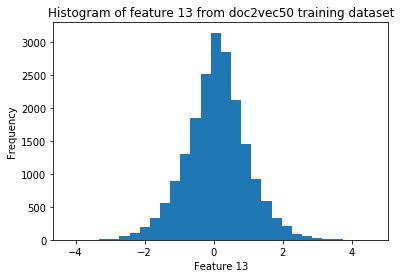

In [40]:
# We draw some histogram from description data frame above

# First feature from the description data frame above
plt.hist(doc50_train[13],bins=30)
plt.xlabel("Feature 13")
plt.ylabel("Frequency")
plt.title("Histogram of feature 13 from doc2vec50 training dataset")
plt.show()

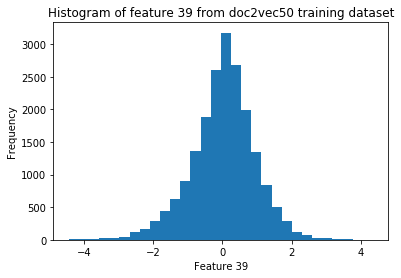

In [41]:
# Second feature from the description data frame above
plt.hist(doc50_train[39],bins=30)
plt.xlabel("Feature 39")
plt.ylabel("Frequency")
plt.title("Histogram of feature 39 from doc2vec50 training dataset")
plt.show()

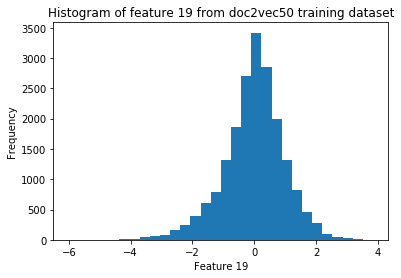

In [42]:
# Last feature from the description data frame above
plt.hist(doc50_train[19],bins=30)
plt.xlabel("Feature 19")
plt.ylabel("Frequency")
plt.title("Histogram of feature 19 from doc2vec50 training dataset")
plt.show()

In [43]:
# We discuss why GaussianNB is ill-performed here
# From the result above, we know these features histograms are nearly normal distributed and there is no extreme outliers
# Thus, reason 2 is not convinced
# Reason 1 is more acceptable
# Features are not considered as interpretable concept and features in doc2vec are not representative

In [44]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [45]:
# https://monkeylearn.com/blog/what-is-tf-idf/
# tf-idf(term frequency-inverse document frequency) evaluates how relevant a word is to a document in a collection of documents
# The higher frequency of a word, the less likely to assess its sentiment (less informative)
tfidf = TfidfTransformer().fit(sparse_train)
tfidf_train = tfidf.transform(sparse_train)
tfidf_devel = tfidf.transform(sparse_devel)
tfidf

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [46]:
tfidf_train.shape

(19647, 41648)

In [47]:
# SelectKBest is able to do feature filtering by chi2 and mutual_info(discrete)
# We have to find an appropriate k where k is the number of features we need
kbest = SelectKBest(chi2,k=4000).fit(sparse_train,y_train)
kbest_train = kbest.transform(sparse_train)
kbest_devel = kbest.transform(sparse_devel)

In [48]:
kbest

SelectKBest(k=4000, score_func=<function chi2 at 0x0000021DDE1F53A8>)

In [49]:
kbest_train.shape

(19647, 4000)

In [50]:
# Choose a linear model to calculate accuracy
# We do not use MultinomialNB here as tf-idf will return counting number in float
# By choosing different parameters, SGDClassifier could be converted into LinearSVC or LogisticRegression in some way
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC, SVC

In [51]:
# Logistic regression and SGDClassifier
sgd =  SGDClassifier(loss="log",random_state=42)
sgd.fit(sparse_train,y_train)
sgd.score(sparse_train,y_train), sgd.score(sparse_devel,y_devel)

(0.963963963963964, 0.8447927799548747)

In [52]:
lr = LogisticRegression().fit(sparse_train,y_train)
lr.score(sparse_train,y_train), lr.score(sparse_devel,y_devel)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0.9867155290884104, 0.8377864861655385)

## Grid Search with Pipeline

In [53]:
from pprint import pprint
from time import time

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [54]:
# Idea of building pipeline is from the following website
# https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html
# Define a pipeline combining a text feature extractor with a simple classifier
pipeline = Pipeline([
    ('tfidf', TfidfTransformer()),
    ("kbest", SelectKBest()),
    ('clf', SGDClassifier()),
])

# Increase processing time in a combinatorial way
# Modify parameters with grid search function below
parameters = {
    "tfidf__norm": ("l1","l2"),
    "tfidf__sublinear_tf": (True,False),
    "kbest__score_func": (chi2,f_classif),
    "kbest__k": (1000,5000,10000,20000,"all"),
    "clf__penalty": ("l2","elasticnet"),
    "clf__loss": ("hinge","log"),
}

# In red output block, we know best parameter combination
if __name__ == "__main__":
    # Multiprocessing requires the fork to happen in a __main__ protected block

    # Find the best parameters for both the feature extraction and the classifier
    grid_search = GridSearchCV(pipeline,parameters,cv=5,n_jobs=-1,verbose=1)
    
    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(sparse_train,y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Performing grid search...
pipeline: ['tfidf', 'kbest', 'clf']
parameters:
{'clf__loss': ('hinge', 'log'),
 'clf__penalty': ('l2', 'elasticnet'),
 'kbest__k': (1000, 5000, 10000, 20000, 'all'),
 'kbest__score_func': (<function chi2 at 0x0000021DDE1F53A8>,
                       <function f_classif at 0x0000021DDE1F2EE8>),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__sublinear_tf': (True, False)}
Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  2.1min finished


done in 127.166s

Best score: 0.846
Best parameters set:
	clf__loss: 'hinge'
	clf__penalty: 'l2'
	kbest__k: 'all'
	kbest__score_func: <function chi2 at 0x0000021DDE1F53A8>
	tfidf__norm: 'l2'
	tfidf__sublinear_tf: True


In [55]:
# Some analysis
# 

In [56]:
# Best parameter combination from grid search
grid_search.best_params_

{'clf__loss': 'hinge',
 'clf__penalty': 'l2',
 'kbest__k': 'all',
 'kbest__score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>,
 'tfidf__norm': 'l2',
 'tfidf__sublinear_tf': True}

In [57]:
results = grid_search.cv_results_
test_scores = results["mean_test_score"]
params = results["params"]
rank = results["rank_test_score"]
results["rank_test_score"]

array([159, 156,  38,  40, 141, 141,  33,  35, 110, 103,  31,  30, 112,
       111,  23,  25, 104,  86,   8,  18, 106,  94,  11,  24,  86,  86,
         2,  17,  93,  86,   4,  16, 100,  86,   1,  12, 100,  86,   3,
         9, 140, 113,  37,  39, 131, 131,  34,  36, 108,  86,  28,  32,
       109, 105,  22,  29, 100,  83,  13,  27, 106,  94,  14,  26,  94,
        81,   5,  21,  94,  83,  10,  15,  94,  81,   7,  20,  94,  83,
         6,  19, 155, 136,  78,  80, 122, 136,  74,  76, 143, 146,  59,
        72, 127, 128,  54,  70, 133, 134,  45,  58, 143, 146,  47,  61,
       120, 136,  49,  60, 120, 146,  52,  67, 114, 146,  50,  53, 114,
       128,  42,  63, 143, 160,  77,  79, 130, 135,  73,  75, 116, 157,
        56,  71, 116, 146,  55,  69, 122, 146,  41,  63, 116, 146,  51,
        65, 116, 146,  43,  62, 122, 157,  46,  66, 122, 136,  48,  68,
       122, 146,  44,  57])

In [58]:
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_clf__loss', 'param_clf__penalty', 'param_kbest__k', 'param_kbest__score_func', 'param_tfidf__norm', 'param_tfidf__sublinear_tf', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [59]:
# Indices of the first 5 best combinations 
rank.argsort()[:5]

array([34, 26, 38, 30, 66], dtype=int64)

In [60]:
# The first 5 best combinations and their selected hyperparameters 
np.take(params,list(rank.argsort()[:5]))

array([{'clf__loss': 'hinge', 'clf__penalty': 'l2', 'kbest__k': 'all', 'kbest__score_func': <function chi2 at 0x0000021DDE1F53A8>, 'tfidf__norm': 'l2', 'tfidf__sublinear_tf': True},
       {'clf__loss': 'hinge', 'clf__penalty': 'l2', 'kbest__k': 20000, 'kbest__score_func': <function chi2 at 0x0000021DDE1F53A8>, 'tfidf__norm': 'l2', 'tfidf__sublinear_tf': True},
       {'clf__loss': 'hinge', 'clf__penalty': 'l2', 'kbest__k': 'all', 'kbest__score_func': <function f_classif at 0x0000021DDE1F2EE8>, 'tfidf__norm': 'l2', 'tfidf__sublinear_tf': True},
       {'clf__loss': 'hinge', 'clf__penalty': 'l2', 'kbest__k': 20000, 'kbest__score_func': <function f_classif at 0x0000021DDE1F2EE8>, 'tfidf__norm': 'l2', 'tfidf__sublinear_tf': True},
       {'clf__loss': 'hinge', 'clf__penalty': 'elasticnet', 'kbest__k': 20000, 'kbest__score_func': <function chi2 at 0x0000021DDE1F53A8>, 'tfidf__norm': 'l2', 'tfidf__sublinear_tf': True}],
      dtype=object)

In [61]:
# Test scores of the first 5 combinations are closed
np.take(test_scores,list(rank.argsort()[:5]))

array([0.84582908, 0.84511644, 0.84435311, 0.8439457 , 0.84313149])

In [62]:
# Best hyperparameters for tfidf and SGDClassifier seems consistent
# We can see that by dropping to only 20000 features(40000 features in total),
# where we only suffer a negligible loss of cross-validated train accuracy

In [63]:
# Difference between development accuracy
tfidf = TfidfTransformer(norm="l2",sublinear_tf=True).fit(sparse_train)
tfidf_train = tfidf.transform(sparse_train)
tfidf_devel = tfidf.transform(sparse_devel)
tfidf_test = tfidf.transform(test_sparse)

In [64]:
# Trial for using all features via SGDClassifier with the best hyperparameter combination
sgd_all = SGDClassifier(loss="hinge",penalty="l2").fit(tfidf_train,y_train)
sgd_all.score(tfidf_train,y_train), sgd_all.score(tfidf_devel,y_devel)

(0.9085865526543493, 0.8514428215176345)

In [65]:
# Trial for using 20000 features via SGDClassifier with a non-best hyperparameter combination,
# where these features were selected by chi2
kbest = SelectKBest(score_func=chi2,k=20000).fit(tfidf_train,y_train)
train_20K = kbest.transform(tfidf_train)
devel_20K = kbest.transform(tfidf_devel)
test_20K = kbest.transform(tfidf_test)

sgd_all = SGDClassifier(loss="hinge",penalty="l2").fit(tfidf_train,y_train)
sgd_all.score(tfidf_train,y_train), sgd_all.score(tfidf_devel,y_devel)

(0.9091973329261465, 0.8526303289395559)

In [66]:
# If we drop half features, there is no obvious difference in scores
# Our model will run faster if choosing 20000 features

In [67]:
# For doc2vec, we start with the one containing 200 features
sgd = SGDClassifier().fit(doc200_train,y_train)
sgd.score(doc200_train,y_train), sgd.score(doc200_devel,y_devel)

(0.8296941008805415, 0.8231801448759055)

## Build and Evaluate Models

In [68]:
# Based on a hypothesis which sparse matrix is linear separable, we use linear models
from sklearn.model_selection import cross_validate, cross_val_score as cvscore
from sklearn.metrics import classification_report, confusion_matrix

## LinearSVC on sparse matrix with 20K features

In [69]:
svc = LinearSVC().fit(train_20K,y_train)
cvscore(svc,train_20K,y_train,cv=5).mean(), svc.score(devel_20K,y_devel)

(0.8472031614594162, 0.8517990737442109)

In [70]:
# Evaluate a result

# According to the report, we know SVC is well-performed on label 5, followed by label 1 and label 3
# A possible reason would be that label 3 is most ambigious/confusing
# SVC is less-performed on label 5 that could be cause by uneven label 1 distribution
# Overall, this model is competent as we use linear separable data

svc_pred_20K = svc.predict(devel_20K)
print(classification_report(y_devel,svc_pred_20K))

              precision    recall  f1-score   support

           1       0.84      0.63      0.72       717
           3       0.71      0.65      0.68      1854
           5       0.89      0.94      0.92      5850

    accuracy                           0.85      8421
   macro avg       0.81      0.74      0.77      8421
weighted avg       0.85      0.85      0.85      8421



In [71]:
matrix_svc = confusion_matrix(y_devel,svc_pred_20K)
matrix_svc

array([[ 452,  184,   81],
       [  67, 1199,  588],
       [  18,  310, 5522]], dtype=int64)

In [72]:
from sklearn.preprocessing import normalize
normed_matrix_svc = normalize(matrix_svc, axis=1, norm='l1')
normed_matrix_svc

array([[0.63040446, 0.25662483, 0.11297071],
       [0.03613808, 0.64670982, 0.3171521 ],
       [0.00307692, 0.05299145, 0.94393162]])

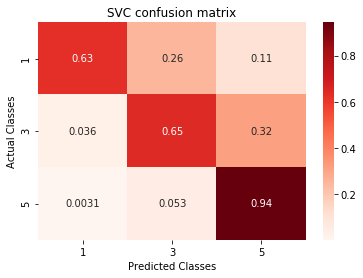

In [73]:
import seaborn as sns
#sns.heatmap(norm_matrix_svc,annot=True,fmt="d",xticklabels=["1","3","5"],yticklabels=["1","3","5"],cmap="Reds")
sns.heatmap(normed_matrix_svc,annot=True,xticklabels=["1","3","5"],yticklabels=["1","3","5"],cmap="Reds")
plt.title("SVC confusion matrix")
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

Text(33.0, 0.5, 'Actual Classes')

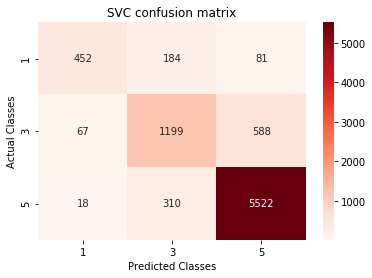

In [74]:
sns.heatmap(matrix_svc,annot=True,fmt="d",xticklabels=["1","3","5"],yticklabels=["1","3","5"],cmap="Reds")
#sns.heatmap(norm_matrix_svc,annot=True,xticklabels=["1","3","5"],yticklabels=["1","3","5"],cmap="Reds")
plt.title("SVC confusion matrix")
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")

In [75]:
# Use validation curve and learning curve to evaluate
from sklearn.model_selection import validation_curve, learning_curve

In [76]:
# Determine best regularization parameter in LinearSVC
# Select 10 points between e^-2 and e^2
param_range = np.logspace(-2,2,10)
train_scores, valid_scores = validation_curve(LinearSVC(),train_20K,y_train,
                                              "C",param_range=param_range,cv=5,n_jobs=-1,verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  50 | elapsed:    0.8s remaining:   13.3s
[Parallel(n_jobs=-1)]: Done   9 out of  50 | elapsed:    2.2s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:    5.8s remaining:   13.6s
[Parallel(n_jobs=-1)]: Done  21 out of  50 | elapsed:   10.2s remaining:   14.1s
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:   16.1s remaining:   13.7s
[Parallel(n_jobs=-1)]: Done  33 out of  50 | elapsed:   20.4s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:   22.7s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:   30.2s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   36.5s finished


In [77]:
# Every subset represents a C
train_scores

array([[0.71591271, 0.71801234, 0.71561267, 0.71618527, 0.71624889],
       [0.8046701 , 0.80708787, 0.807291  , 0.8060822 , 0.80449167],
       [0.87001336, 0.87071324, 0.86989439, 0.87084871, 0.86728591],
       [0.91798689, 0.91881402, 0.91665606, 0.91907367, 0.91862832],
       [0.95756188, 0.95768913, 0.95692836, 0.95896424, 0.95807355],
       [0.98288477, 0.98154864, 0.98263138, 0.98244051, 0.98231327],
       [0.99408284, 0.99414647, 0.99421046, 0.99484667, 0.99440132],
       [0.99821849, 0.99809124, 0.99860033, 0.99815498, 0.99840947],
       [0.999491  , 0.99968187, 0.99955465, 0.99923654, 0.99936379],
       [0.99980912, 0.99980912, 0.99974551, 0.99961827, 0.99974551]])

In [78]:
valid_scores

array([[0.71094148, 0.70941476, 0.71315856, 0.71010435, 0.71137694],
       [0.78727735, 0.78066158, 0.78340545, 0.78365996, 0.78951387],
       [0.83435115, 0.82493639, 0.82743701, 0.82718249, 0.83685416],
       [0.84910941, 0.84351145, 0.84627132, 0.84550776, 0.85237974],
       [0.8475827 , 0.84860051, 0.85008908, 0.84958005, 0.85390685],
       [0.84503817, 0.84529262, 0.84347162, 0.84118096, 0.84474421],
       [0.83256997, 0.83435115, 0.83278188, 0.83100025, 0.83583609],
       [0.82366412, 0.82035623, 0.8215831 , 0.81776533, 0.82031051],
       [0.81323155, 0.80559796, 0.81165691, 0.80402138, 0.80783914],
       [0.80559796, 0.79491094, 0.80529397, 0.79689488, 0.79918554]])

In [79]:
mean_train_scores = np.mean(train_scores,axis=1)
std_train_scores = np.std(train_scores,axis=1)
mean_valid_scores = np.mean(valid_scores,axis=1)
std_valid_scores = np.std(valid_scores,axis=1)
mean_train_scores, std_train_scores, mean_valid_scores, std_train_scores

(array([0.71639437, 0.80592457, 0.86975112, 0.9182318 , 0.95784343,
        0.98236372, 0.99433755, 0.9982949 , 0.99946557, 0.99974551]),
 array([8.39735399e-04, 1.17236099e-03, 1.28817018e-03, 8.65781980e-04,
        6.70762328e-04, 4.50762410e-04, 2.75976523e-04, 1.86175819e-04,
        1.53741114e-04, 6.96892365e-05]),
 array([0.71099922, 0.78490364, 0.83015224, 0.84735594, 0.84995184,
        0.84394552, 0.83330787, 0.82073586, 0.80846939, 0.80037666]),
 array([8.39735399e-04, 1.17236099e-03, 1.28817018e-03, 8.65781980e-04,
        6.70762328e-04, 4.50762410e-04, 2.75976523e-04, 1.86175819e-04,
        1.53741114e-04, 6.96892365e-05]))

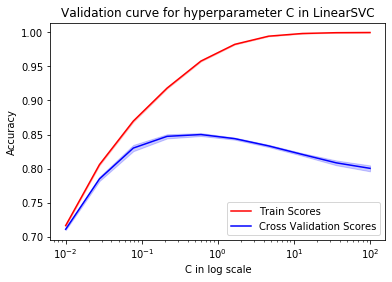

In [80]:
# Plot the curve on log scale
# Scource is from the below website
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.semilogx(param_range,mean_train_scores,label="Train Scores",color="r")
plt.fill_between(param_range,mean_train_scores-std_train_scores,mean_train_scores+std_train_scores,alpha=0.2,color="r")

# Cross Validation Scores has a bigger std
plt.semilogx(param_range,mean_valid_scores,label="Cross Validation Scores",color="b")
plt.fill_between(param_range,mean_valid_scores-std_valid_scores,mean_valid_scores+std_valid_scores,alpha=0.2,color="b")

plt.legend(loc="best")

plt.title("Validation curve for hyperparameter C in LinearSVC")
plt.xlabel("C in log scale")
plt.ylabel("Accuracy")
plt.show()

In [81]:
best_C = param_range[mean_valid_scores.argmax()]
best_C

0.5994842503189409

In [82]:
# Brief analysis:
# Training score continuously increases, as C goes larger, decision boundary goes higher, margin goes smaller, 
# where training results are more precise
# Validation score firstly increases but shrinks with a larger C. The reason would be that over-fitting appears
# Meanwhile, as for the curve of validation score, there are apparant std when C is large. This suggests that generalization is ill-performed
# We choose a highest validation score (0.599)

In [83]:
# Plotting learning curve
# Scource from:
# http://mlwiki.org/index.php/Learning_Curves
train_size, learn_train, learn_test = learning_curve(LinearSVC(C=best_C),train_20K,y_train,train_sizes=np.linspace(0.1,1,5),cv=5,n_jobs=-1,verbose=10)

[learning_curve] Training set sizes: [ 1571  5108  8644 12180 15717]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  25 | elapsed:    0.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   5 out of  25 | elapsed:    0.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:    0.8s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:    1.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  14 out of  25 | elapsed:    1.4s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  17 out of  25 | elapsed:    1.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    2.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.5s finished


In [84]:
# Inspect learning score
learn_train

array([[0.99427116, 0.99681731, 0.99681731, 0.99681731, 0.99681731],
       [0.98042287, 0.98120595, 0.98003132, 0.98003132, 0.98003132],
       [0.97015271, 0.96853309, 0.97061546, 0.97142527, 0.97142527],
       [0.9634647 , 0.96141215, 0.96190476, 0.963711  , 0.96436782],
       [0.95756188, 0.95768913, 0.95698925, 0.95921614, 0.95800725]])

In [85]:
mean_learn_train = np.mean(learn_train,axis=1)
std_learn_train = np.std(learn_train,axis=1)
mean_learn_test = np.mean(learn_test,axis=1)
std_learn_test = np.std(learn_test,axis=1)
mean_learn_train, std_learn_train, mean_learn_test, std_learn_test

(array([0.99630808, 0.98034456, 0.97043036, 0.96297209, 0.95789273]),
 array([0.00101846, 0.00045661, 0.00106683, 0.00112333, 0.00073915]),
 array([0.78785506, 0.82938871, 0.83911035, 0.84684701, 0.84959551]),
 array([0.00639971, 0.00236854, 0.00260358, 0.00256792, 0.00222577]))

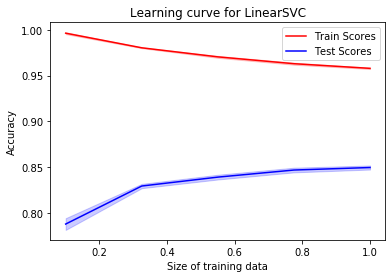

In [86]:
plt.plot(np.linspace(0.1,1,5),mean_learn_train,label="Train Scores",color="r")
plt.fill_between(np.linspace(0.1,1,5),mean_learn_train-std_learn_train,
                mean_learn_train+std_learn_train,alpha=0.2,color="r")

plt.plot(np.linspace(0.1,1,5),mean_learn_test,label="Test Scores",color="b")
plt.fill_between(np.linspace(0.1,1,5),mean_learn_test-std_learn_test,
                mean_learn_test+std_learn_test,alpha=0.2,color="b")

plt.legend(loc="best")

plt.title("Learning curve for LinearSVC")
plt.xlabel("Size of training data")
plt.ylabel("Accuracy")
plt.show()

In [87]:
# Brief analysis
# The wider the gap between 2 curves are, the less accuracy between training and validation, the higher we have risk of overfitting
# Test score curve shows that if we input more training data, we would have less std and higher scores
# When size of training data hits a specific value, 2 curves will be paralleled (Stablized)

In [88]:
final_svc = LinearSVC(C=best_C).fit(train_20K,y_train)
cvscore(final_svc,train_20K,y_train,cv=5).mean(), final_svc.score(devel_20K,y_devel)

(0.8499518359274061, 0.8561928512053201)

## Logistic Regression on doc2vec_200

In [89]:
lr = LogisticRegression(solver="lbfgs",multi_class="ovr").fit(doc200_train,y_train)
cvscore(lr,doc200_train,y_train,cv=5).mean(), lr.score(doc200_devel,y_devel)

(0.8262329244859616, 0.833867711673198)

In [90]:
# We modify 2 parameters and plot a heatmap by combining grid search and heatmap
param_lr = {
    "C":[0.01,0.1,0.5,1.5,10,100],
    #"penalty": ["12","elasticnet"],
    "multi_class":["multinomial","ovr"],
}

# In red output block, we know best parameter combination
if __name__ == "__main__":
    # Multiprocessing requires the fork to happen in a __main__ protected block

    # Find the best parameters for both the feature extraction and the classifier
    grid_search_lr = GridSearchCV(LogisticRegression(solver="lbfgs"),param_lr,cv=5,n_jobs=-1,verbose=1)
    
    print("Performing grid search...")
    print("parameters:")
    pprint(param_lr)
    t0 = time()
    grid_search_lr.fit(doc200_train,y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search_lr.best_score_)
    print("Best parameters set:")
    best_param_lr = grid_search_lr.best_estimator_.get_params()
    for param_name in sorted(param_lr.keys()):
        print("\t%s: %r" % (param_name, best_param_lr[param_name]))

Performing grid search...
parameters:
{'C': [0.01, 0.1, 0.5, 1.5, 10, 100], 'multi_class': ['multinomial', 'ovr']}
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   26.7s finished


done in 28.679s

Best score: 0.829
Best parameters set:
	C: 0.5
	multi_class: 'multinomial'


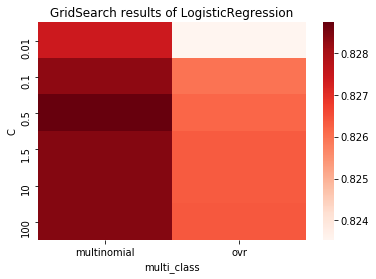

In [91]:
lr_scores = grid_search_lr.cv_results_["mean_test_score"].reshape(6,2)
sns.heatmap(lr_scores,xticklabels=param_lr["multi_class"],yticklabels=param_lr["C"],cmap="Reds")

plt.title("GridSearch results of LogisticRegression")
plt.xlabel("multi_class")
plt.ylabel("C")
plt.show()

In [92]:
# Brief analysis:
# In every situation, multinomial has higher accuracies than ovr
# Multinomial is a joint model while ovr is a stratified model
# When C is around 0.5, both multinomial and ovr hit a peak accuracy

In [93]:
train_size, learn_train, learn_test = learning_curve(
    LogisticRegression(C=0.5,multi_class="multinomial",solver="lbfgs"),doc200_train,y_train,
    train_sizes=np.linspace(0.1,1,5),cv=5,n_jobs=-1,verbose=10
)

[learning_curve] Training set sizes: [ 1571  5108  8644 12180 15717]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  25 | elapsed:    0.8s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done   5 out of  25 | elapsed:    2.3s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:    3.2s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:    3.7s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  14 out of  25 | elapsed:    4.6s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  17 out of  25 | elapsed:    5.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    6.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    7.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.7s finished


In [94]:
mean_learn_train = np.mean(learn_train,axis=1)
std_learn_train = np.std(learn_train,axis=1)
mean_learn_test = np.mean(learn_test,axis=1)
std_learn_test = np.std(learn_test,axis=1)
mean_learn_train, std_learn_train, mean_learn_test, std_learn_test

(array([0.89879058, 0.85270164, 0.84509486, 0.84114943, 0.84124197]),
 array([0.00127307, 0.00089799, 0.00086881, 0.00148275, 0.00151978]),
 array([0.77899953, 0.81900535, 0.82434969, 0.826233  , 0.82877778]),
 array([0.00516145, 0.00252341, 0.00248597, 0.00343864, 0.00305098]))

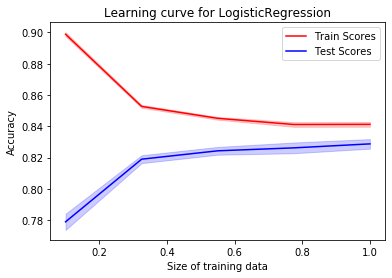

In [95]:
plt.plot(np.linspace(0.1,1,5),mean_learn_train,label="Train Scores",color="r")
plt.fill_between(np.linspace(0.1,1,5),mean_learn_train-std_learn_train,
                mean_learn_train+std_learn_train,alpha=0.2,color="r")

plt.plot(np.linspace(0.1,1,5),mean_learn_test,label="Test Scores",color="b")
plt.fill_between(np.linspace(0.1,1,5),mean_learn_test-std_learn_test,
                mean_learn_test+std_learn_test,alpha=0.2,color="b")

plt.legend(loc="best")

plt.title("Learning curve for LogisticRegression")
plt.xlabel("Size of training data")
plt.ylabel("Accuracy")
plt.show()

In [96]:
# Brief analysis (like LinearSVC)
# The wider the gap between 2 curves are, the less accuracy between training and validation, the higher we have risk of overfitting
# Test score curve shows that if we input more training data, we would have less std and higher scores
# When size of training data hits a specific value, 2 curves will be paralleled (Stablized)

# Converging faster than LinearSVC
# Compared with LinearSVC, LogisticRegression needs less data to perform better (Advantage)

In [97]:
final_lr = LogisticRegression(C=0.5,solver="lbfgs",multi_class="multinomial").fit(doc200_train,y_train)
cvscore(final_lr,doc200_train,y_train,cv=5).mean(), final_lr.score(doc200_devel,y_devel)

(0.828726874024106, 0.8379052369077307)

In [98]:
# generative model vs discriminative model

## Ensemble Models

In [99]:
# Import bagging, voting, random forest, and boosting classifiers
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [100]:
base_classifiers = [
    ("sgd", SGDClassifier()),
    ("dt", DecisionTreeClassifier()),
    # Switch default solver to saga, because default solver does not support sparse matirx while saga runs fast
    ("lr", LogisticRegression(C=0.5,solver="saga",multi_class="multinomial")),
    ("mnb", MNB()),
    ("svc", LinearSVC(C=best_C))
]

### Bagging

In [101]:
# Use decision tree as base classifier
bagging = BaggingClassifier(base_estimator=SGDClassifier()).fit(train_20K,y_train)
cvscore(bagging,train_20K,y_train,cv=5).mean(), bagging.score(devel_20K,y_devel)

(0.8476104415719996, 0.8532240826505165)

### Voting

In [102]:
voting = VotingClassifier(estimators=base_classifiers,voting="hard")
voting.fit(train_20K,y_train)
cvscore(voting,train_20K,y_train,cv=5).mean(), voting.score(devel_20K,y_devel)

(0.8404337939909216, 0.8487115544472152)

### Random Forest

In [103]:
# Decision tree is not competent with dealing with this problem, as we have heaps of features
rf = RandomForestClassifier(n_jobs=-1,n_estimators=100,verbose=1).fit(train_20K,y_train)
cvscore(rf,train_20K,y_train,cv=5).mean(), rf.score(devel_20K,y_devel)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs

(0.748562272966012, 0.7615485096781854)

In [104]:
# Brief analysis
# Both random forest and decision tree do not output a high result
# A reason would be that we have tremendous features and instances in this problem
# https://www.quora.com/What-are-the-advantages-and-disadvantages-for-a-random-forest-algorithm

### Boosting

In [105]:
# A simple decision tree with depth 1
ab = AdaBoostClassifier().fit(train_20K,y_train)
cvscore(ab,train_20K,y_train,cv=5).mean(), ab.score(devel_20K,y_devel)

(0.7764037751514316, 0.7848236551478447)

In [106]:
# # A simple decision tree with depth 1
# gb = GradientBoostingClassifier().fit(train_20K,y_train)
# cvscore(gb,train_20K,y_train,cv=5).mean(), gb.score(devel_20K,y_devel)

### Stacking

In [107]:
estimators = [('svc', LinearSVC(random_state=42))]
st = StackingClassifier(estimators=estimators).fit(train_20K,y_train)
cvscore(st,train_20K,y_train,cv=5).mean(), st.score(devel_20K,y_devel)

(0.8513259594442578, 0.8564303526897044)

### Adding feedback information

In [108]:
# Breif analysis

In [109]:
train_doc2vec53 = train_doc2vec50.join(feedback)
train_doc2vec53.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,vote_funny,vote_cool,vote_useful
0,0.878508,-0.921865,1.041951,-0.442659,0.314465,0.516447,-0.483630,1.740442,1.186326,0.975157,...,-1.427045,0.671864,-1.269260,0.366261,-1.461988,-1.354277,0.846137,0,1,3
1,0.702511,-0.307338,1.182641,-0.647916,0.608985,0.006024,-0.420182,0.645829,-0.234737,2.084816,...,0.739345,-2.734058,-0.994866,-0.899577,-0.291003,-0.137514,-0.541647,0,0,0
2,0.163672,0.493242,1.130909,-1.848056,1.883512,-2.317537,2.192569,0.942131,1.660533,-2.046016,...,-0.477067,-0.843311,-0.235060,-3.267487,-0.080276,-2.365990,-0.088761,1,0,1
3,-1.464438,0.962851,-0.362837,0.139058,0.371398,-0.477407,0.075963,0.517986,-0.484253,1.322117,...,0.666551,0.454338,0.735081,-0.456556,-1.040474,-1.095729,-0.418161,17,3,3
4,-0.652090,0.351715,-1.870239,0.047474,2.558941,-0.110524,0.068561,2.161655,-1.361464,-0.274840,...,1.608605,-0.397988,-2.350459,-0.925956,0.500559,1.315240,0.265349,0,0,0


In [110]:
fb_50_train, fb_50_devel = train_test_split(train_doc2vec53,test_size=0.3,random_state=42)

In [111]:
LogisticRegression().fit(doc50_train,y_train).score(doc50_devel,y_devel)

0.8191426196413728

In [112]:
LogisticRegression().fit(fb_50_train,y_train).score(fb_50_devel,y_devel)

0.8235363971024819

In [113]:
fb_train, fb_devel = train_test_split(feedback,test_size=0.3,random_state=42)

In [114]:
train_20K_fb = sparse.hstack((train_20K,fb_train))
train_20K_fb

<19647x20003 sparse matrix of type '<class 'numpy.float64'>'
	with 929465 stored elements in COOrdinate format>

In [115]:
dev_20K_fb = LinearSVC(C=best_C).fit(train_20K,y_train)


In [116]:
final_svc = LinearSVC(C=best_C).fit(train_20K,y_train)
cvscore(final_svc,train_20K,y_train,cv=5).mean(), final_svc.score(devel_20K,y_devel)

(0.8499518359274061, 0.8561928512053201)

### Feature Importance

#### SelectKBest

In [117]:
kbest.scores_

array([9.40618135, 1.05978623, 0.10308585, ..., 0.4120714 , 0.04562532,
       0.06109199])

In [118]:
# Number of nan
sum(~np.isnan(kbest.scores_))

35528

In [119]:
# Select 20 highest-scored features
kbest.scores_.argsort()[:35527][-20:][::-1]

array([41047, 18347, 25682, 37036,  2788,  3212, 37621, 22554,  1985,
       10200,  4452, 28798,  4136, 26319, 36732, 23147, 23712, 40240,
       11268, 25686], dtype=int64)

In [120]:
kbest.scores_[41047]

160.51221424382587

In [121]:
array = kbest.scores_
n_not_nan = sum(~np.isnan(array))
names = []
# Indexes of 20 features with highest score
indexes = array.argsort()[:n_not_nan-1][-20:][::-1]
for i in indexes:
    names.append(vocabulary.get_feature_names()[i])
scores = [array[i] for i in indexes]
scores_names = sorted(zip(scores,names),reverse=True)

# List 20 highest-scored vocabularies
# Apparently many of them are emotional
scores_names

[(160.51221424382587, 'worst'),
 (126.66413016303477, 'horrible'),
 (123.06654297677781, 'ok'),
 (111.43595706737318, 'terrible'),
 (90.60258490204376, 'asked'),
 (86.07749858012025, 'awful'),
 (80.40067363104508, 'told'),
 (78.12863542882633, 'manager'),
 (70.62617700007742, 'amazing'),
 (69.19617147707626, 'decent'),
 (65.70059048623983, 'bland'),
 (64.83481117519912, 'pretty'),
 (62.007841740049585, 'best'),
 (61.58491904600238, 'overpriced'),
 (60.62160336242613, 'tasteless'),
 (59.622004627101276, 'mediocre'),
 (59.08336840422151, 'minutes'),
 (58.235029088904646, 'waste'),
 (57.40751704113822, 'disgusting'),
 (55.73533025789517, 'okay')]

## Prediction

In [122]:
test_20K

<7018x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 325171 stored elements in Compressed Sparse Row format>

In [123]:
pred = final_svc.predict(test_20K)
pred

array([5, 5, 1, ..., 3, 5, 5], dtype=int64)

In [124]:
test_review = pd.read_csv("COMP30027_2020_assignment2_datasets/review_text_test.csv")
test_out = pd.DataFrame()
test_out["Instance_id"] = test_review.index
test_out["rating"] = pred
test_out["Instance_id"] = test_out["Instance_id"] + 1
test_out.head()

,Instance_id,rating
0,1,5
1,2,5
2,3,1
3,4,5
4,5,5


In [125]:
test_out.to_csv("predict.csv",index=False)

In [141]:
doc200_test = pd.read_csv("COMP30027_2020_assignment2_datasets/review_text_features_doc2vec200/review_text_test_doc2vec200.csv",header=None)

In [142]:
pred2 = final_lr.predict(doc200_test)
pred2.shape

(7018,)

In [143]:
test_review = pd.read_csv("COMP30027_2020_assignment2_datasets/review_text_test.csv")
test_out2 = pd.DataFrame()
test_out2["Instance_id"] = test_review.index
test_out2["rating"] = pred2
test_out2["Instance_id"] = test_out2["Instance_id"] + 1
test_out2.head()
test_out2.to_csv("predict2.csv",index=False)